In [1]:
#Importing requirred libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
from google.colab import files
doc = files.upload()

Saving book.csv to book (2).csv


In [3]:
# Importing the dataset book.csv
book_df = pd.read_csv("book.csv", encoding='ISO-8859-1')
book_df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
# Selecting columns except first one which is of no use
df = book_df.iloc[:,1:]
df

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [5]:
# Renaming the column names by removing the Dots in it
df.rename(columns={'User.ID':'UserID', 'Book.Title':'BookTitle', 'Book.Rating':'BookRating'},inplace=True)
df

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


##### Descriptive Analytics

In [6]:
df.dtypes

UserID         int64
BookTitle     object
BookRating     int64
dtype: object

In [7]:
df.isna().sum()

UserID        0
BookTitle     0
BookRating    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      10000 non-null  int64 
 1   BookTitle   10000 non-null  object
 2   BookRating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.describe()

,UserID,BookRating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


##### EDA

In [10]:
df.shape

(10000, 3)

In [11]:
df.isna().sum()

UserID        0
BookTitle     0
BookRating    0
dtype: int64

In [12]:
len(df.UserID.unique())

2182

In [13]:
len(df.BookTitle.unique())

9659

In [14]:
df[df.duplicated()]

,UserID,BookTitle,BookRating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [15]:
df.T.duplicated()

UserID        False
BookTitle     False
BookRating    False
dtype: bool

In [16]:
# The rows which are duplicated
df[(df['UserID']==2152) & (df['BookRating']==7) & (df['BookTitle']=="Le nouveau soleil de Teur")]

,UserID,BookTitle,BookRating
5050,2152,Le nouveau soleil de Teur,7
5051,2152,Le nouveau soleil de Teur,7


In [17]:
df[(df['UserID']==3757) & (df['BookRating']==7) & (df['BookTitle']=="The Magician's Tale")]

,UserID,BookTitle,BookRating
7045,3757,The Magician's Tale,7
7439,3757,The Magician's Tale,7


In [18]:
# Deleteing the duplicated rows
df.drop_duplicates(inplace=True)
# df.drop_duplicates(keep='last')

In [19]:
#Resetting the index after deleting duplicated rows
df.reset_index(drop=True, inplace=True)

In [20]:
# Count of unique books
df['BookTitle'].value_counts()

Fahrenheit 451                                              5
Stardust                                                    4
The Amber Spyglass (His Dark Materials, Book 3)             4
Ender's Game (Ender Wiggins Saga (Paperback))               4
The Subtle Knife (His Dark Materials, Book 2)               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: BookTitle, Length: 9659, dtype: int64

Text(0.5, 1.0, 'Distribution of Book Ratings')

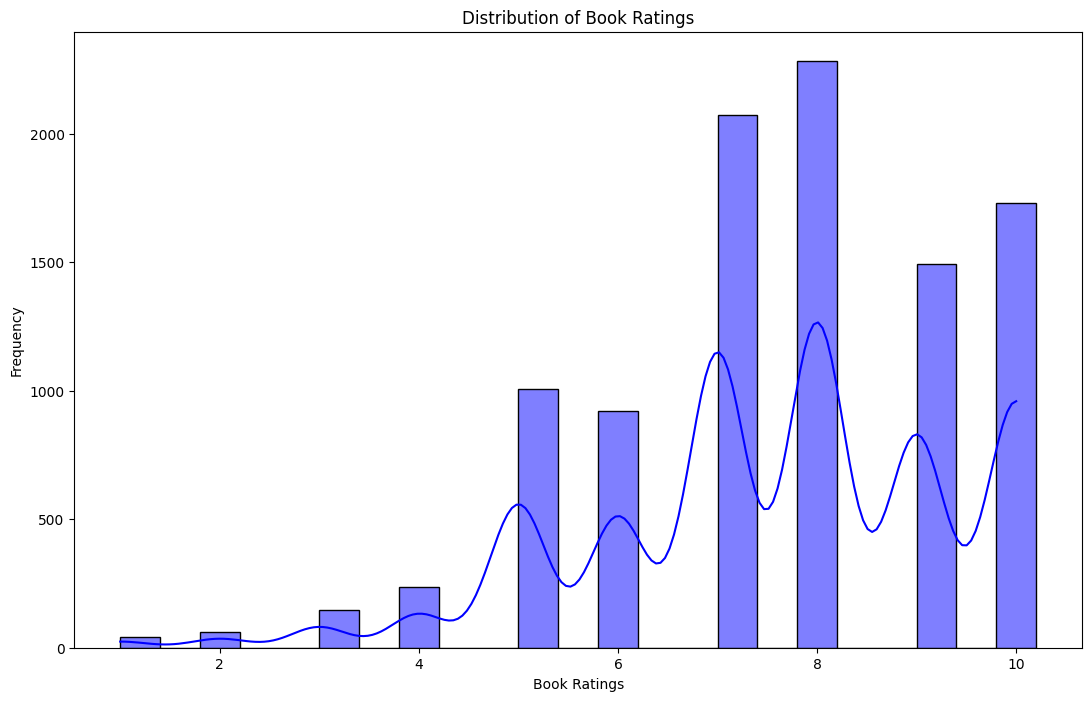

In [21]:
# Here we can see the distribution of the ratings, where the most rating given is 8 and the least is 1
plt.figure(figsize=(13,8))
sns.histplot(df['BookRating'],kde=True,color='blue',edgecolor='black',binwidth=0.4)
plt.xlabel('Book Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')

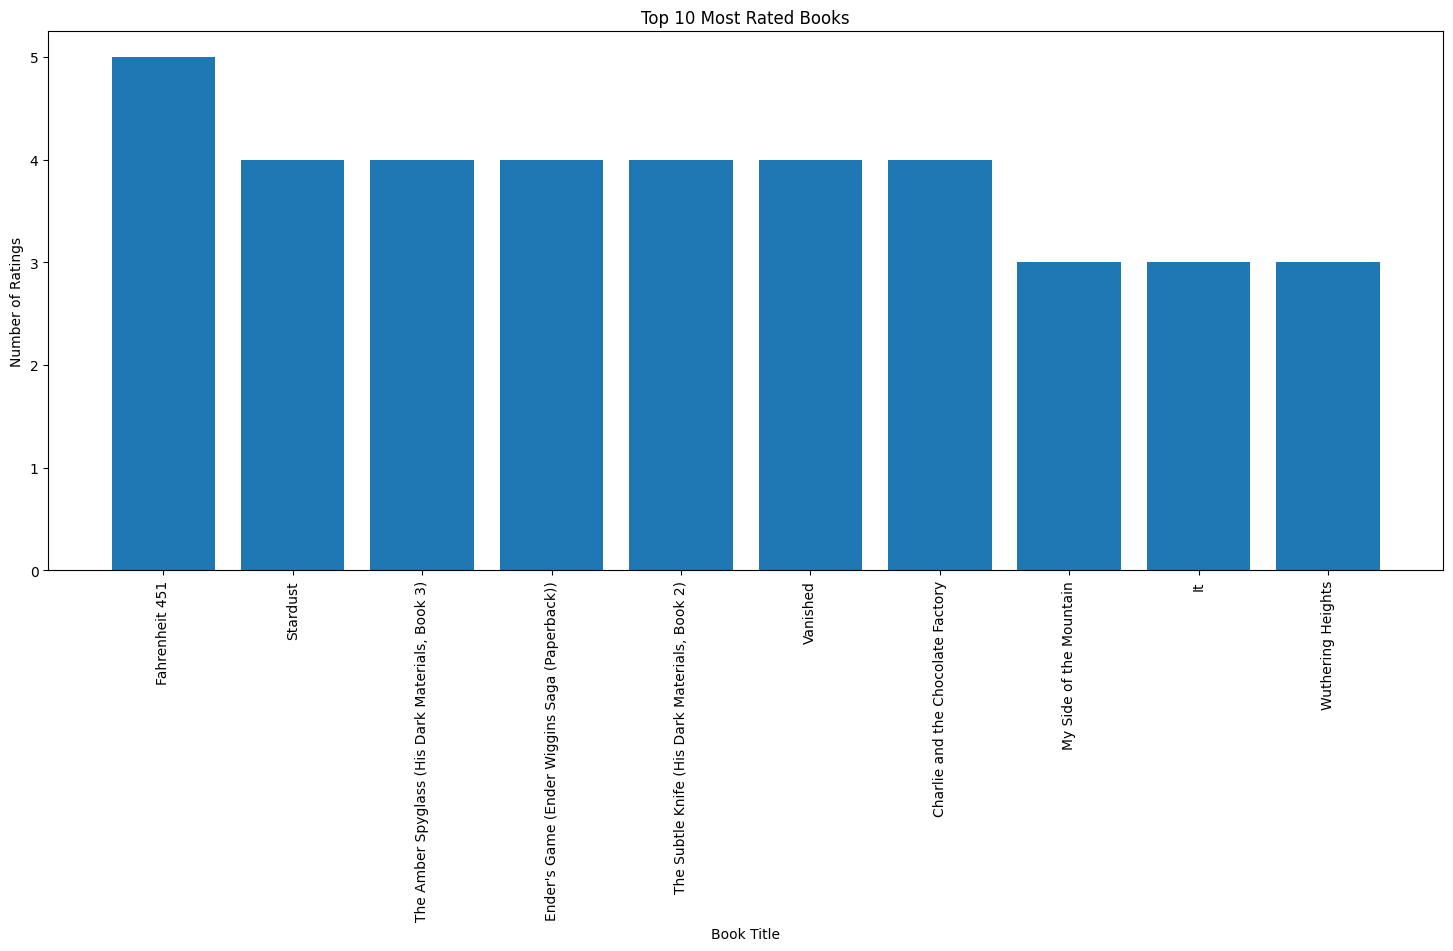

In [22]:
# Top 10 high rated books, the books which is high rated is Fahrenheit 451.
book_rating_counts = df['BookTitle'].value_counts()
plt.figure(figsize=(18,7))
plt.bar(book_rating_counts.index[:10], book_rating_counts[:10])
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Rated Books')
plt.xticks(rotation='vertical')
plt.show()

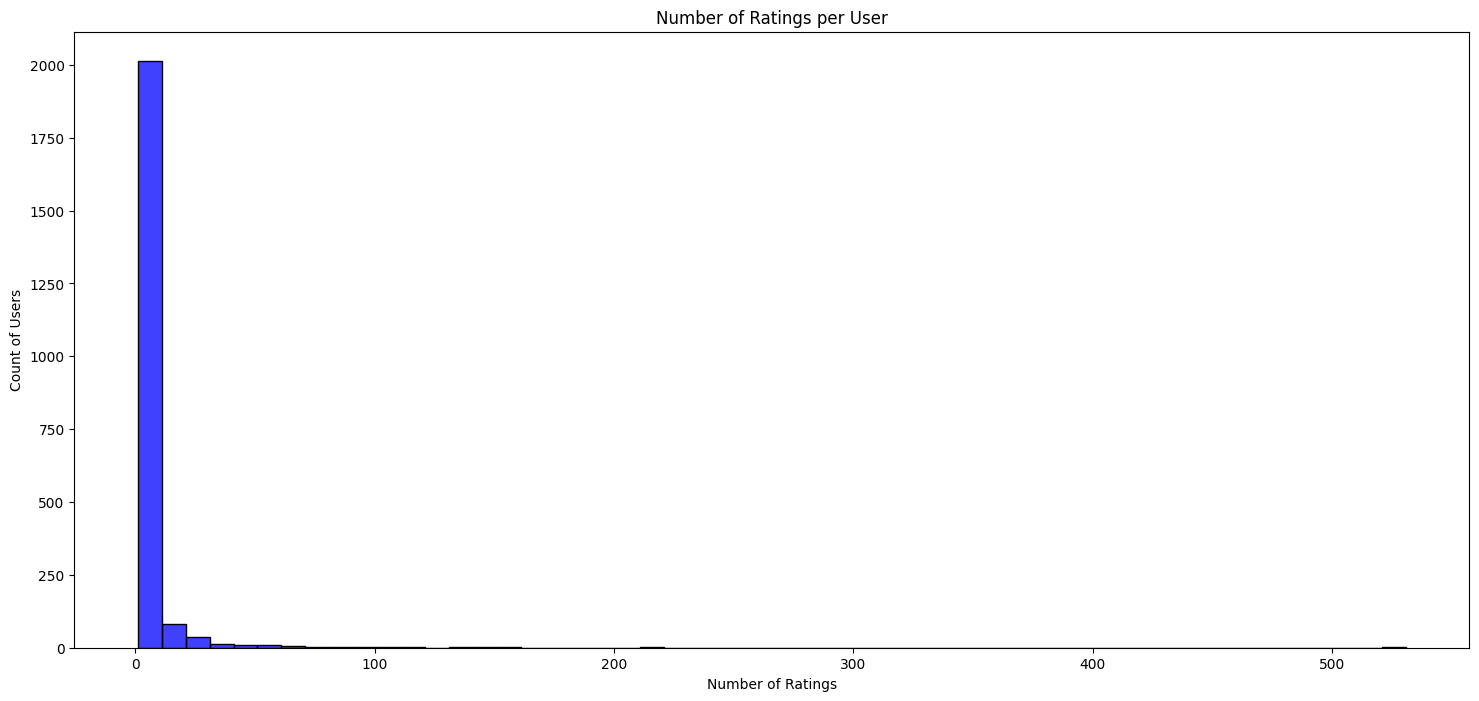

In [23]:
# Count of Ratings per User - Number of ratings given by number of users, where there are some users
# who has given 500+ ratings to books, however most of the users have given ratings to around 1 to 10 books only
user_rating_counts = df['UserID'].value_counts()
plt.figure(figsize=(18,8))
sns.histplot(user_rating_counts,color='blue',edgecolor='black',binwidth=10)
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.title('Number of Ratings per User')
plt.show()

In [24]:
# df = df.pivot(index='UserID', columns='BookTitle', values='BookRating')

# Pivot table to apply cosine similarity (person-person similarity)

reader_df = df.pivot_table(index='UserID', columns='BookTitle', values='BookRating', aggfunc='mean')
reader_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [25]:
# Setting index as unique UserID
reader_df.index = df.UserID.unique()
reader_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# filling NaN value with 0 to all the rows
reader_df.fillna(0,inplace=True)
reader_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Calculating Cosine Similarity between Book Readers

reader_siml = 1 - pairwise_distances(reader_df.values,metric='cosine')
reader_siml

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
#Storing the result in a dataframe
reader_siml_df = pd.DataFrame(reader_siml)

In [29]:
reader_siml_df.index = df.UserID.unique()
reader_siml_df.columns = df.UserID.unique()

In [30]:
reader_siml_df.iloc[0:20,0:20]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
np.fill_diagonal(reader_siml,0)
reader_siml_df.iloc[0:20,0:20]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Most similar Readers

reader_siml_df.idxmax(axis=1)[0:15]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
276755    276726
276760    276726
276762    276726
276768    276726
276772      1491
dtype: int64

In [33]:
# Filtering out the similar readers to recommend the book, which means the book read by UserId 276729 can be recommended to the
# UserId 276726 and vice-versa
# Same way all the recommendation happens to the users, more such recommendations are shown below

df[(df['UserID']==276729) | (df['UserID']==276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [34]:
df[(df['UserID']==276736) | (df['UserID']==276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [35]:
df[(df['UserID']==276748) | (df['UserID']==161677)]

,UserID,BookTitle,BookRating
12,276748,The Middle Stories,6
9188,161677,The Biggest Pumpkin Ever,8
9189,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9190,161677,Do You Know?,5
9191,161677,The good-by day (A Little golden book),8
9192,161677,Pooh Trick or Treat! (Little Golden Books),6
9193,161677,Cookie Monster/Cookie Tree,8
9194,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9195,161677,I Think That It is Wonderful: Featuring Jim He...,8
9196,161677,Grover's Own Alphabet,8


In [36]:
df[(df['UserID']==276772) | (df['UserID']==1491) | (df['UserID']==276726)]

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
22,276772,If I'd Known Then What I Know Now: Why Not Lea...,7
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10
4107,1491,Fifth business,7


In [37]:
reader1 = df[df['UserID']==1491]
reader1

,UserID,BookTitle,BookRating
4107,1491,Fifth business,7


In [38]:
reader2 = df[df['UserID']==161677]
reader2

,UserID,BookTitle,BookRating
9188,161677,The Biggest Pumpkin Ever,8
9189,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9190,161677,Do You Know?,5
9191,161677,The good-by day (A Little golden book),8
9192,161677,Pooh Trick or Treat! (Little Golden Books),6
9193,161677,Cookie Monster/Cookie Tree,8
9194,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9195,161677,I Think That It is Wonderful: Featuring Jim He...,8
9196,161677,Grover's Own Alphabet,8
9197,161677,Best Little Word Book Ever! (Little Golden Book),10


In [39]:
reader1.BookTitle

4107    Fifth business
Name: BookTitle, dtype: object

In [40]:
reader2.BookTitle

9188                             The Biggest Pumpkin Ever
9189    The Twelve Dancing Princesses: A Folk Tale fro...
9190                                         Do You Know?
9191               The good-by day (A Little golden book)
9192           Pooh Trick or Treat! (Little Golden Books)
9193                           Cookie Monster/Cookie Tree
9194    My Little Golden Book of Cars and Trucks (Litt...
9195    I Think That It is Wonderful: Featuring Jim He...
9196                                Grover's Own Alphabet
9197     Best Little Word Book Ever! (Little Golden Book)
9198      Busiest Firefighters Ever! (Little Golden Book)
9199                  The Monster at the End of This Book
9200                                             Kat Kong
9201                             IF YOU'RE AFRAID OF DARK
Name: BookTitle, dtype: object

In [41]:
# Below, merging book read by two users and has given the rating, here is how same book is recommended to the other users, the one which
# shows more similarity merging into one dataframe and recommend to one another based on similarity and rating and other parameters.
pd.merge(reader1,reader2, on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,1491.0,Fifth business,7.0,NaN,NaN
1,NaN,The Biggest Pumpkin Ever,NaN,161677.0,8.0
2,NaN,The Twelve Dancing Princesses: A Folk Tale fro...,NaN,161677.0,9.0
3,NaN,Do You Know?,NaN,161677.0,5.0
4,NaN,The good-by day (A Little golden book),NaN,161677.0,8.0
5,NaN,Pooh Trick or Treat! (Little Golden Books),NaN,161677.0,6.0
6,NaN,Cookie Monster/Cookie Tree,NaN,161677.0,8.0
7,NaN,My Little Golden Book of Cars and Trucks (Litt...,NaN,161677.0,7.0
8,NaN,I Think That It is Wonderful: Featuring Jim He...,NaN,161677.0,8.0
9,NaN,Grover's Own Alphabet,NaN,161677.0,8.0
